<a href="https://colab.research.google.com/github/Kell1000/Big_data/blob/main/Test_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des Logs Android
## Comptage par minute, par heure et par niveau

In [14]:
import re
from collections import Counter

print("="*60)
print("ANALYSE DES LOGS ANDROID")
print("="*60)

ANALYSE DES LOGS ANDROID


## 1. Lecture du fichier Android.log

In [15]:
print("\n[1/5] Lecture du fichier Android.log...")
with open("Android.log", "r", encoding="utf-8", errors='ignore') as file:
    log_lines = file.readlines()

print(f"✓ Nombre de lignes lues: {len(log_lines):,}")
print(f"✓ Premières 3 lignes:")
for i, line in enumerate(log_lines[:3], 1):
    print(f"  {i}. {line.strip()[:100]}...")


[1/5] Lecture du fichier Android.log...
✓ Nombre de lignes lues: 1,555,005
✓ Premières 3 lignes:
  1. 12-17 19:31:36.263  1795  1825 I PowerManager_screenOn: DisplayPowerStatesetColorFadeLevel: level=1....
  2. 12-17 19:31:36.263  5224  5283 I SendBroadcastPermission: action:android.com.huawei.bone.NOTIFY_SPOR...
  3. 12-17 19:31:36.264  1795  1825 D DisplayPowerController: Animating brightness: target=21, rate=40...


## 2. Définition des fonctions de parsing

In [16]:
def parse_log_line(line):
    """Extrait le timestamp et le level d'une ligne de log"""
    try:
        # Essayer de trouver un timestamp
        timestamp_match = re.search(r'(\d{4}-\d{2}-\d{2}[T ]\d{2}:\d{2})|' +
                                   r'(\d{2}-\d{2} \d{2}:\d{2})|' +
                                   r'(\d{2}:\d{2}:\d{2})', line)
        
        # Essayer de trouver le level (E, W, I, D, V, ERROR, WARN, INFO, DEBUG, VERBOSE)
        level_match = re.search(r'\b([EWIDV])\b|\[(ERROR|WARN|WARNING|INFO|DEBUG|VERBOSE)\]', line, re.IGNORECASE)
        
        timestamp = timestamp_match.group(0) if timestamp_match else None
        level = level_match.group(1) or level_match.group(2) if level_match else 'UNKNOWN'
        
        return (timestamp, level.upper())
    except:
        return (None, 'UNKNOWN')

def extract_hour(timestamp):
    """Extrait l'heure d'un timestamp"""
    if not timestamp:
        return 'UNKNOWN'
    try:
        hour_match = re.search(r'(\d{2}):\d{2}', timestamp)
        if hour_match:
            return hour_match.group(1) + ':00'
        return 'UNKNOWN'
    except:
        return 'UNKNOWN'

def extract_minute(timestamp):
    """Extrait l'heure et la minute d'un timestamp"""
    if not timestamp:
        return 'UNKNOWN'
    try:
        minute_match = re.search(r'(\d{2}:\d{2})', timestamp)
        if minute_match:
            return minute_match.group(1)
        return 'UNKNOWN'
    except:
        return 'UNKNOWN'

print("✓ Fonctions de parsing définies")

✓ Fonctions de parsing définies


## 3. Parsing de toutes les lignes

In [17]:
print("\n[2/5] Parsing des logs...")

parsed_logs = []
for i, line in enumerate(log_lines):
    if i % 100000 == 0 and i > 0:
        print(f"  Progression: {i:,} / {len(log_lines):,} lignes ({i*100//len(log_lines)}%)")
    parsed_logs.append(parse_log_line(line))

print(f"✓ {len(parsed_logs):,} lignes parsées")


[2/5] Parsing des logs...
  Progression: 100,000 / 1,555,005 lignes (6%)
  Progression: 200,000 / 1,555,005 lignes (12%)
  Progression: 300,000 / 1,555,005 lignes (19%)
  Progression: 400,000 / 1,555,005 lignes (25%)
  Progression: 500,000 / 1,555,005 lignes (32%)
  Progression: 600,000 / 1,555,005 lignes (38%)
  Progression: 700,000 / 1,555,005 lignes (45%)
  Progression: 800,000 / 1,555,005 lignes (51%)
  Progression: 900,000 / 1,555,005 lignes (57%)
  Progression: 1,000,000 / 1,555,005 lignes (64%)
  Progression: 1,100,000 / 1,555,005 lignes (70%)
  Progression: 1,200,000 / 1,555,005 lignes (77%)
  Progression: 1,300,000 / 1,555,005 lignes (83%)
  Progression: 1,400,000 / 1,555,005 lignes (90%)
  Progression: 1,500,000 / 1,555,005 lignes (96%)
✓ 1,555,005 lignes parsées


## 4. COUNT PAR NIVEAU (LEVEL)

In [18]:
print("\n[3/5] Comptage par niveau...")
print("\n" + "="*60)
print("COUNT PAR NIVEAU (LEVEL)")
print("="*60)

level_counter = Counter()
for timestamp, level in parsed_logs:
    level_counter[level] += 1

# Trier par nombre de messages (décroissant)
level_results = sorted(level_counter.items(), key=lambda x: x[1], reverse=True)
for level, count in level_results:
    print(f"{level}: {count:,} messages")

print(f"\nTotal: {sum(level_counter.values()):,} messages")


[3/5] Comptage par niveau...

COUNT PAR NIVEAU (LEVEL)
I: 766,146 messages
D: 505,608 messages
E: 157,829 messages
W: 80,882 messages
V: 44,408 messages
UNKNOWN: 132 messages

Total: 1,555,005 messages


## 5. COUNT PAR HEURE

In [19]:
print("\n[4/5] Comptage par heure...")
print("\n" + "="*60)
print("COUNT PAR HEURE")
print("="*60)

hour_counter = Counter()
for timestamp, level in parsed_logs:
    hour = extract_hour(timestamp)
    hour_counter[hour] += 1

# Trier par heure
hour_results = sorted(hour_counter.items(), key=lambda x: x[0])
for hour, count in hour_results:
    print(f"{hour}: {count:,} messages")

print(f"\nTotal: {sum(hour_counter.values()):,} messages")


[4/5] Comptage par heure...

COUNT PAR HEURE
00:00: 48,236 messages
01:00: 3,998 messages
02:00: 2,436 messages
03:00: 2,400 messages
04:00: 2,243 messages
05:00: 2,010 messages
06:00: 2,366 messages
07:00: 68,650 messages
08:00: 96,895 messages
09:00: 58,555 messages
10:00: 63,337 messages
11:00: 17,530 messages
12:00: 23,303 messages
13:00: 7,824 messages
14:00: 144,006 messages
15:00: 120,131 messages
16:00: 14,270 messages
17:00: 77,221 messages
18:00: 64,810 messages
19:00: 167,159 messages
20:00: 138,489 messages
21:00: 198,153 messages
22:00: 96,650 messages
23:00: 134,333 messages

Total: 1,555,005 messages


## 6. COUNT PAR MINUTE

In [20]:
print("\n[5/5] Comptage par minute...")
print("\n" + "="*60)
print("COUNT PAR MINUTE (Top 50)")
print("="*60)

minute_counter = Counter()
for timestamp, level in parsed_logs:
    minute = extract_minute(timestamp)
    minute_counter[minute] += 1

# Trier par nombre de messages (décroissant) et prendre le top 50
minute_results = sorted(minute_counter.items(), key=lambda x: x[1], reverse=True)[:50]
for minute, count in minute_results:
    print(f"{minute}: {count:,} messages")

print(f"\nNombre total de minutes différentes: {len(minute_counter):,}")


[5/5] Comptage par minute...

COUNT PAR MINUTE (Top 50)
14:12: 27,208 messages
19:49: 27,125 messages
14:11: 24,365 messages
21:26: 16,886 messages
15:33: 16,548 messages
14:13: 15,283 messages
19:50: 14,591 messages
21:58: 14,101 messages
21:32: 13,732 messages
15:36: 13,705 messages
19:31: 13,030 messages
17:30: 12,241 messages
20:31: 12,140 messages
10:52: 11,981 messages
16:01: 11,839 messages
21:50: 11,831 messages
14:10: 11,406 messages
19:25: 10,975 messages
19:33: 10,801 messages
20:11: 10,791 messages
15:28: 10,582 messages
21:27: 10,029 messages
14:14: 9,967 messages
15:27: 9,659 messages
21:52: 9,413 messages
15:35: 9,178 messages
15:37: 9,106 messages
22:30: 9,096 messages
21:53: 8,894 messages
15:32: 8,866 messages
19:57: 8,750 messages
14:08: 8,634 messages
14:07: 8,535 messages
17:41: 8,275 messages
21:48: 8,151 messages
12:38: 8,057 messages
18:32: 7,844 messages
21:47: 7,571 messages
09:11: 7,496 messages
14:15: 7,491 messages
10:39: 7,484 messages
19:35: 7,447 messag

## 7. Sauvegarde des résultats

In [21]:
print("\n" + "="*60)
print("SAUVEGARDE DES RÉSULTATS")
print("="*60)

# Sauvegarder les counts par level
with open("count_by_level.txt", "w", encoding="utf-8") as f:
    for level, count in level_results:
        f.write(f"{level}: {count}\n")
print("✓ Count par level sauvegardé dans: count_by_level.txt")

# Sauvegarder les counts par heure
with open("count_by_hour.txt", "w", encoding="utf-8") as f:
    for hour, count in hour_results:
        f.write(f"{hour}: {count}\n")
print("✓ Count par heure sauvegardé dans: count_by_hour.txt")

# Sauvegarder tous les counts par minute
all_minute_results = sorted(minute_counter.items(), key=lambda x: x[1], reverse=True)
with open("count_by_minute.txt", "w", encoding="utf-8") as f:
    for minute, count in all_minute_results:
        f.write(f"{minute}: {count}\n")
print("✓ Count par minute sauvegardé dans: count_by_minute.txt")


SAUVEGARDE DES RÉSULTATS
✓ Count par level sauvegardé dans: count_by_level.txt
✓ Count par heure sauvegardé dans: count_by_hour.txt
✓ Count par minute sauvegardé dans: count_by_minute.txt


## 8. Statistiques globales

In [22]:
print("\n" + "="*60)
print("STATISTIQUES GLOBALES")
print("="*60)

total_logs = len(log_lines)
print(f"Nombre total de lignes de log: {total_logs:,}")

# Statistiques sur les minutes
minute_counts = list(minute_counter.values())
if minute_counts:
    print(f"\nMessages par minute:")
    print(f"  - Moyenne: {sum(minute_counts)/len(minute_counts):,.2f}")
    print(f"  - Maximum: {max(minute_counts):,}")
    print(f"  - Minimum: {min(minute_counts):,}")

# Statistiques sur les heures
hour_counts = list(hour_counter.values())
if hour_counts:
    print(f"\nMessages par heure:")
    print(f"  - Moyenne: {sum(hour_counts)/len(hour_counts):,.2f}")
    print(f"  - Maximum: {max(hour_counts):,}")
    print(f"  - Minimum: {min(hour_counts):,}")

# Statistiques par niveau
print(f"\nRépartition par niveau:")
total = sum(level_counter.values())
for level, count in level_results:
    percentage = (count / total) * 100
    print(f"  - {level}: {percentage:.2f}%")

print("\n" + "="*60)
print("ANALYSE TERMINÉE !")
print("="*60)


STATISTIQUES GLOBALES
Nombre total de lignes de log: 1,555,005

Messages par minute:
  - Moyenne: 2,032.69
  - Maximum: 27,208
  - Minimum: 1

Messages par heure:
  - Moyenne: 64,791.88
  - Maximum: 198,153
  - Minimum: 2,010

Répartition par niveau:
  - I: 49.27%
  - D: 32.51%
  - E: 10.15%
  - W: 5.20%
  - V: 2.86%
  - UNKNOWN: 0.01%

ANALYSE TERMINÉE !


## 9. Visualisation graphique (optionnel)

✓ Graphique sauvegardé dans: log_analysis.png


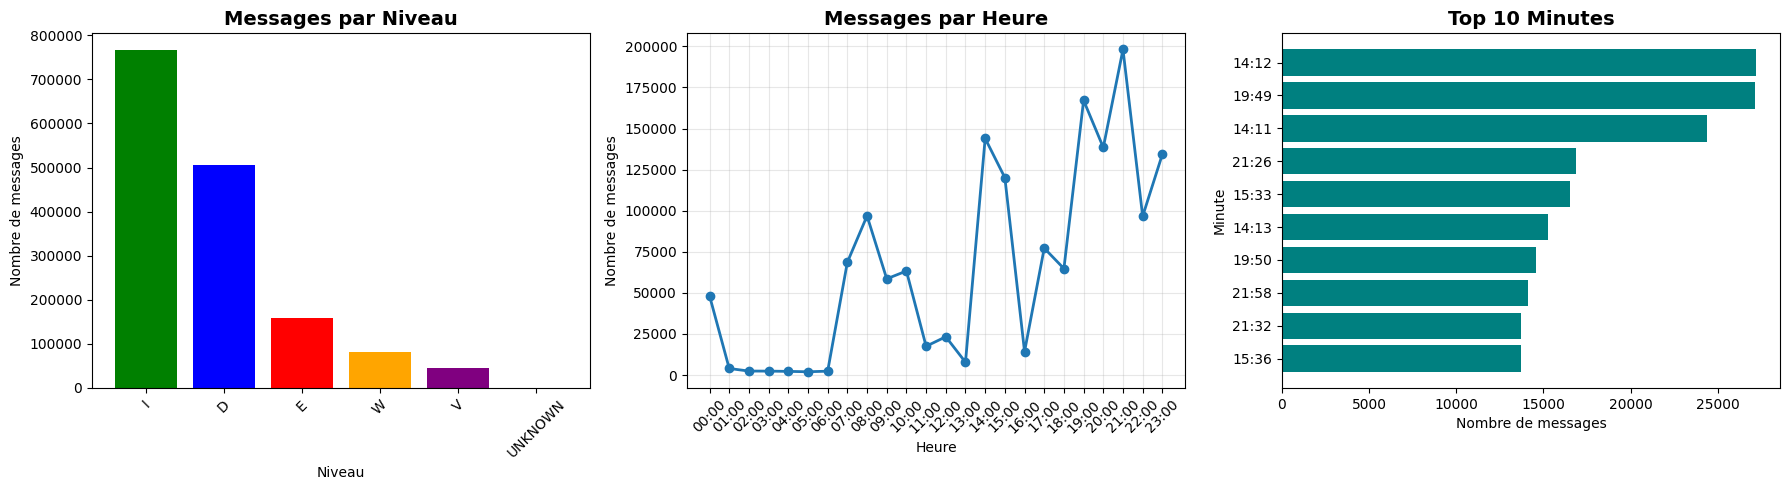

In [23]:
# Installer matplotlib si nécessaire
try:
    import matplotlib.pyplot as plt
except:
    print("Installation de matplotlib...")
    !pip install matplotlib
    import matplotlib.pyplot as plt

# Graphique des niveaux
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Count par niveau
levels = [item[0] for item in level_results]
counts = [item[1] for item in level_results]
axes[0].bar(levels, counts, color=['green', 'blue', 'red', 'orange', 'purple', 'gray'])
axes[0].set_title('Messages par Niveau', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Niveau')
axes[0].set_ylabel('Nombre de messages')
axes[0].tick_params(axis='x', rotation=45)

# 2. Count par heure
hours = [item[0] for item in hour_results if item[0] != 'UNKNOWN']
hour_counts_list = [item[1] for item in hour_results if item[0] != 'UNKNOWN']
axes[1].plot(hours, hour_counts_list, marker='o', linewidth=2, markersize=6)
axes[1].set_title('Messages par Heure', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Heure')
axes[1].set_ylabel('Nombre de messages')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# 3. Top 10 minutes
top_minutes = minute_results[:10]
minutes = [item[0] for item in top_minutes]
minute_counts_list = [item[1] for item in top_minutes]
axes[2].barh(minutes, minute_counts_list, color='teal')
axes[2].set_title('Top 10 Minutes', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Nombre de messages')
axes[2].set_ylabel('Minute')
axes[2].invert_yaxis()

plt.tight_layout()
plt.savefig('log_analysis.png', dpi=300, bbox_inches='tight')
print("✓ Graphique sauvegardé dans: log_analysis.png")
plt.show()